### Project: Regression - Week 3

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from dash import Dash, html, dcc
import plotly.express as px
import plotly.graph_objects as go

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
df.shape, df.columns

((10886, 12),
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
       dtype='object'))

### Create time-related features

### Extract features like hour, month etc. from the datetime column.

In [4]:
def create_datetime(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month_name()
    df['day'] = df['datetime'].dt.day_name()
    df['hour'] = df['datetime'].dt.hour
    df['week'] = df['datetime'].dt.isocalendar().week
    df['day_of_week'] = df['datetime'].dt.weekday
create_datetime(df)

In [5]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,week,day_of_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,January,Saturday,0,52,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,January,Saturday,1,52,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,January,Saturday,2,52,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,January,Saturday,3,52,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,January,Saturday,4,52,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,December,Wednesday,19,51,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,December,Wednesday,20,51,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,December,Wednesday,21,51,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,December,Wednesday,22,51,2


In [6]:
X = df.drop(['casual', 'registered', 'count'], axis=1)
y = df[['count']]

In [7]:
# The function train_test_split() randomly separate the data. If you want controll the randomness you set the random_state to a value
Xtrain, Xval, ytrain, yval= train_test_split(X,y, test_size=.20, random_state=60)

In [8]:
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((8708, 15), (2178, 15), (8708, 1), (2178, 1))

In [9]:
df_train = pd.concat([Xtrain, ytrain], axis=1)
df_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,week,day_of_week,count
2308,2011-06-04 02:00:00,2,0,0,1,22.14,25.760,56,12.9980,2011,June,Saturday,2,22,5,59
3052,2011-07-16 02:00:00,3,0,0,1,24.60,29.545,73,8.9981,2011,July,Saturday,2,28,5,58
1984,2011-05-09 14:00:00,2,0,1,1,25.42,31.060,41,15.0013,2011,May,Monday,14,19,0,162
7483,2012-05-11 04:00:00,2,0,1,1,17.22,21.210,50,12.9980,2012,May,Friday,4,19,4,9
4047,2011-09-19 16:00:00,3,0,1,2,24.60,30.305,60,11.0014,2011,September,Monday,16,38,0,263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10339,2012-11-16 05:00:00,4,0,1,2,12.30,15.910,65,6.0032,2012,November,Friday,5,46,4,36
6543,2012-03-09 21:00:00,1,0,1,1,14.76,16.665,34,22.0028,2012,March,Friday,21,10,4,141
1418,2011-04-04 23:00:00,2,0,1,2,26.24,31.060,47,15.0013,2011,April,Monday,23,14,0,48
3137,2011-07-19 15:00:00,3,0,1,1,36.08,40.910,44,12.9980,2011,July,Tuesday,15,29,1,158


In [10]:
df_val = pd.concat([Xval, yval], axis=1)
df_val

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,week,day_of_week,count
218,2011-01-10 09:00:00,1,0,1,2,5.74,6.060,50,16.9979,2011,January,Monday,9,2,0,94
6548,2012-03-10 02:00:00,1,0,0,1,10.66,12.120,41,16.9979,2012,March,Saturday,2,10,5,42
6597,2012-03-12 04:00:00,1,0,1,1,13.94,16.665,61,12.9980,2012,March,Monday,4,11,0,3
8026,2012-06-14 19:00:00,2,0,1,1,28.70,32.575,48,16.9979,2012,June,Thursday,19,24,3,579
8937,2012-08-14 18:00:00,3,0,1,1,31.16,35.605,62,19.0012,2012,August,Tuesday,18,33,1,854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,2012-03-15 19:00:00,1,0,1,2,26.24,31.060,50,12.9980,2012,March,Thursday,19,11,3,425
10437,2012-12-01 07:00:00,4,0,0,2,9.84,12.120,87,8.9981,2012,December,Saturday,7,48,5,63
8768,2012-08-07 17:00:00,3,0,1,2,31.98,37.120,62,8.9981,2012,August,Tuesday,17,32,1,868
5827,2012-01-18 00:00:00,1,0,1,2,18.86,22.725,77,22.0028,2012,January,Wednesday,0,3,2,17


### EDA

In [11]:
df_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,week,day_of_week,count
2308,2011-06-04 02:00:00,2,0,0,1,22.14,25.760,56,12.9980,2011,June,Saturday,2,22,5,59
3052,2011-07-16 02:00:00,3,0,0,1,24.60,29.545,73,8.9981,2011,July,Saturday,2,28,5,58
1984,2011-05-09 14:00:00,2,0,1,1,25.42,31.060,41,15.0013,2011,May,Monday,14,19,0,162
7483,2012-05-11 04:00:00,2,0,1,1,17.22,21.210,50,12.9980,2012,May,Friday,4,19,4,9
4047,2011-09-19 16:00:00,3,0,1,2,24.60,30.305,60,11.0014,2011,September,Monday,16,38,0,263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10339,2012-11-16 05:00:00,4,0,1,2,12.30,15.910,65,6.0032,2012,November,Friday,5,46,4,36
6543,2012-03-09 21:00:00,1,0,1,1,14.76,16.665,34,22.0028,2012,March,Friday,21,10,4,141
1418,2011-04-04 23:00:00,2,0,1,2,26.24,31.060,47,15.0013,2011,April,Monday,23,14,0,48
3137,2011-07-19 15:00:00,3,0,1,1,36.08,40.910,44,12.9980,2011,July,Tuesday,15,29,1,158


In [12]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,week,day_of_week,count
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.0,8708.000000,8708.000000
mean,2.513436,0.030087,0.679949,1.422255,20.265997,23.680347,61.794557,12.811162,2011.501952,11.543523,26.045131,3.017226,192.042719
std,1.118326,0.170837,0.466522,0.636399,7.762119,8.450035,19.269541,8.151673,0.500025,6.922503,15.041527,2.002910,181.259138
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,2011.000000,0.000000,1.0,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,2011.000000,6.000000,14.0,1.000000,43.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,2012.000000,12.000000,27.0,3.000000,146.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,2012.000000,17.000000,40.0,5.000000,283.250000
max,4.000000,1.000000,1.000000,3.000000,39.360000,45.455000,100.000000,56.996900,2012.000000,23.000000,52.0,6.000000,970.000000


In [13]:
df_train.isna().sum()

datetime       0
season         0
holiday        0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
year           0
month          0
day            0
hour           0
week           0
day_of_week    0
count          0
dtype: int64

In [14]:
df = df_train
fig = px.histogram(df, x="month", y="count",
             color='day',
             height=400)
fig.update_layout(title='Average users count per day across the months',
                   xaxis_title='Month', yaxis_title='Users count')
fig.show()

In [15]:
df = df_train
fig = px.histogram(df, x="month", y="count",
             color='month',
             height=400, text_auto='.2s')
fig.update_layout(title='Average users count per day across the months',
                   xaxis_title='Month', yaxis_title='Users count')
fig.show()

In [16]:
df = df_train
fig = px.histogram(df, x="day", y="count",
             color='day',
             height=400, text_auto='.2s')
fig.update_layout(title='Average users count per day across the months',
                   xaxis_title='Day', yaxis_title='Users count')
fig.show()

In [17]:
df = df_train
fig = px.histogram(df, x="hour", y="count",
             color='hour',
             height=400, text_auto='.2s')
fig.update_layout(title='Average Users Count per day across the months',
                   xaxis_title='Hour of the day', yaxis_title='Users count')
fig.show()

In [18]:
df = df_train
fig = px.histogram(df, x="year", y="count",
             color='year',
             height=400, text_auto='.2s')
fig.update_layout(title='Average Users Count per year',
                   xaxis_title='Year', yaxis_title='Users count')
fig.update_xaxes(type='category')
fig.show()

1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

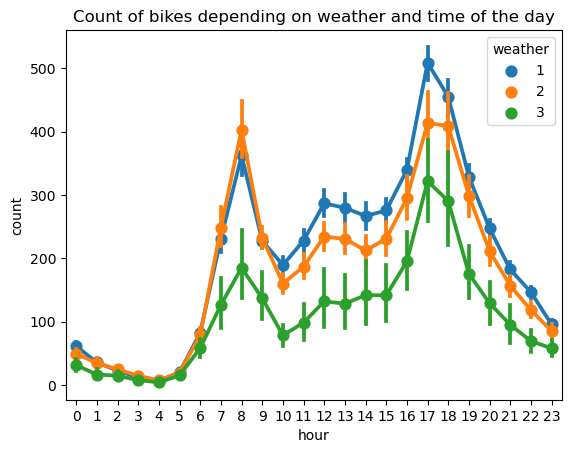

In [19]:
fig, ax = plt.subplots()
sns.pointplot(data=df_train, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='Count of bikes depending on weather and time of the day');

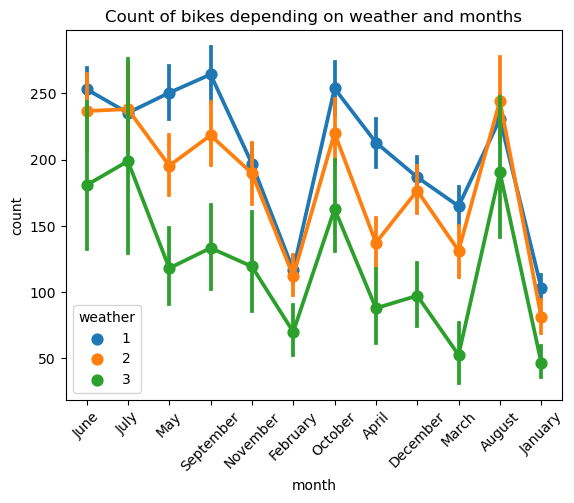

In [ ]:
fig, ax = plt.subplots()
sns.pointplot(data=df_train, x='month', y='count', hue='weather', ax=ax)
ax.set(title='Count of bikes depending on weather and months')
plt.xticks(rotation=45);

### Humidity

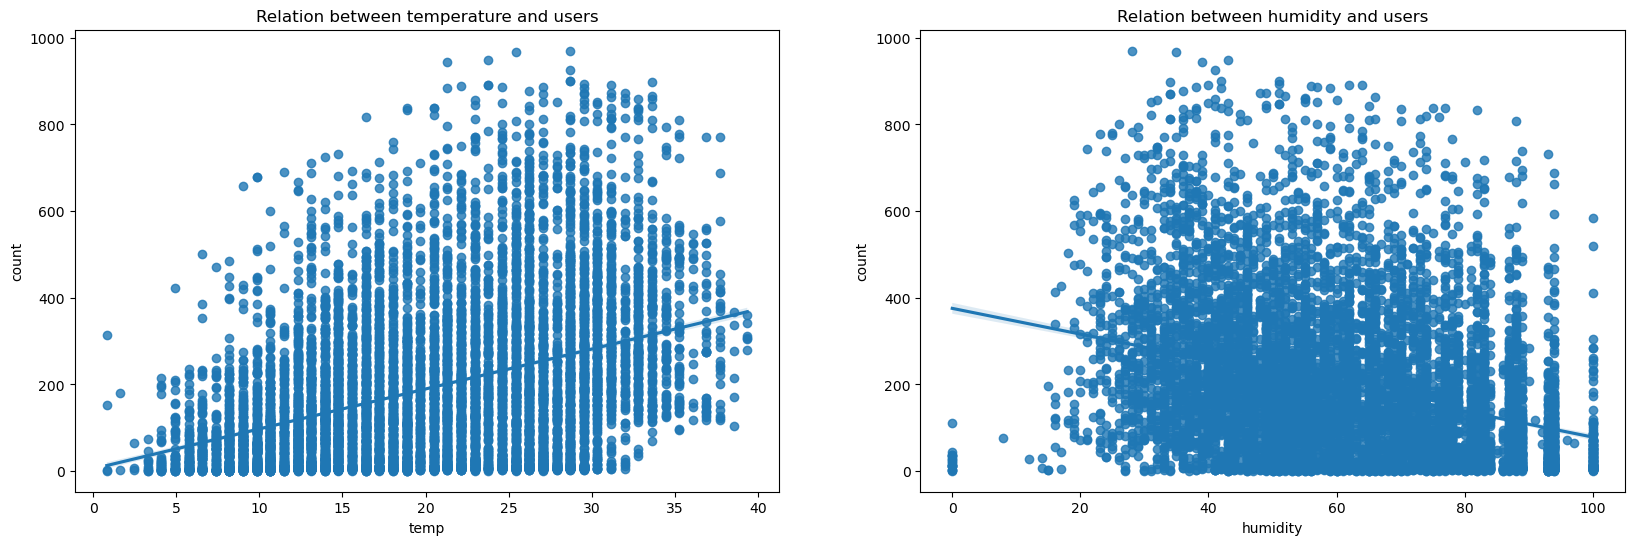

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df_train['temp'], y=df_train['count'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df_train['humidity'], y=df_train['count'], ax=ax2)
ax2.set(title="Relation between humidity and users");

### Plot small sections of the data (1 day, 1 week etc.)

In [ ]:
resample_1 = df_train[['datetime','humidity', 'atemp', 'windspeed', 'count']]
resample_1

,datetime,humidity,atemp,windspeed,count
2308,2011-06-04 02:00:00,56,25.760,12.9980,59
3052,2011-07-16 02:00:00,73,29.545,8.9981,58
1984,2011-05-09 14:00:00,41,31.060,15.0013,162
7483,2012-05-11 04:00:00,50,21.210,12.9980,9
4047,2011-09-19 16:00:00,60,30.305,11.0014,263
...,...,...,...,...,...
10339,2012-11-16 05:00:00,65,15.910,6.0032,36
6543,2012-03-09 21:00:00,34,16.665,22.0028,141
1418,2011-04-04 23:00:00,47,31.060,15.0013,48
3137,2011-07-19 15:00:00,44,40.910,12.9980,158


In [ ]:
resample_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 2308 to 2253
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   8708 non-null   datetime64[ns]
 1   humidity   8708 non-null   int64         
 2   atemp      8708 non-null   float64       
 3   windspeed  8708 non-null   float64       
 4   count      8708 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 408.2 KB


In [ ]:
resample_1.datetime = pd.to_datetime(resample_1.datetime)
resample_1.head(2)

,datetime,humidity,atemp,windspeed,count
2308,2011-06-04 02:00:00,56,25.760,12.9980,59
3052,2011-07-16 02:00:00,73,29.545,8.9981,58


In [ ]:
resample_1.set_index('datetime', inplace=True)

In [ ]:
resample_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8708 entries, 2011-06-04 02:00:00 to 2011-06-01 19:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   humidity   8708 non-null   int64  
 1   atemp      8708 non-null   float64
 2   windspeed  8708 non-null   float64
 3   count      8708 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 340.2 KB


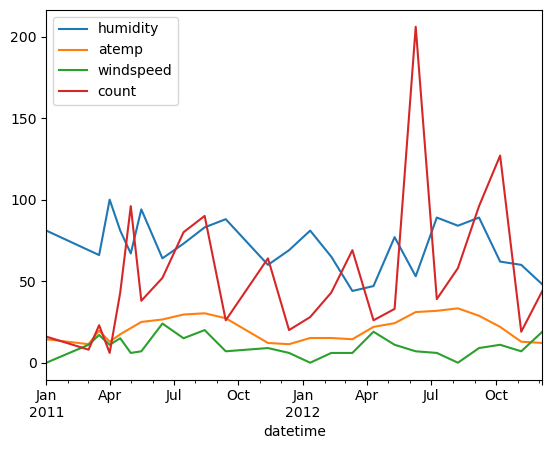

In [ ]:
resample_1.resample('15D').interpolate().plot();

In [ ]:
resample_2 = df_train[['datetime','day', 'month', 'hour', 'season', 'weather', 'count']]
resample_2

,datetime,day,month,hour,season,weather,count
2308,2011-06-04 02:00:00,Saturday,June,2,2,1,59
3052,2011-07-16 02:00:00,Saturday,July,2,3,1,58
1984,2011-05-09 14:00:00,Monday,May,14,2,1,162
7483,2012-05-11 04:00:00,Friday,May,4,2,1,9
4047,2011-09-19 16:00:00,Monday,September,16,3,2,263
...,...,...,...,...,...,...,...
10339,2012-11-16 05:00:00,Friday,November,5,4,2,36
6543,2012-03-09 21:00:00,Friday,March,21,1,1,141
1418,2011-04-04 23:00:00,Monday,April,23,2,2,48
3137,2011-07-19 15:00:00,Tuesday,July,15,3,1,158


In [ ]:
resample_2.datetime = pd.to_datetime(resample_2.datetime)
resample_2.head(2)

,datetime,day,month,hour,season,weather,count
2308,2011-06-04 02:00:00,Saturday,June,2,2,1,59
3052,2011-07-16 02:00:00,Saturday,July,2,3,1,58


In [ ]:
resample_2.set_index('datetime', inplace=True)

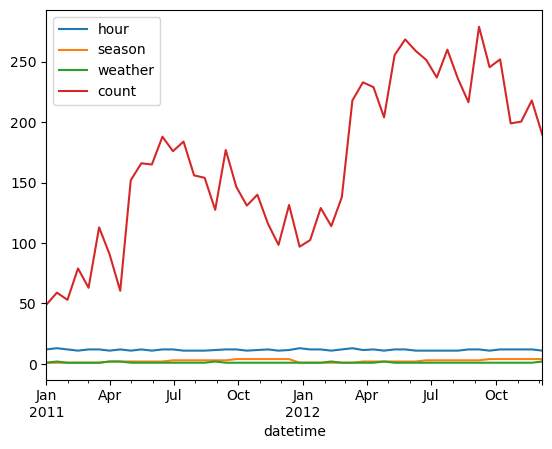

In [ ]:
resample_2.resample('15D').median().plot();

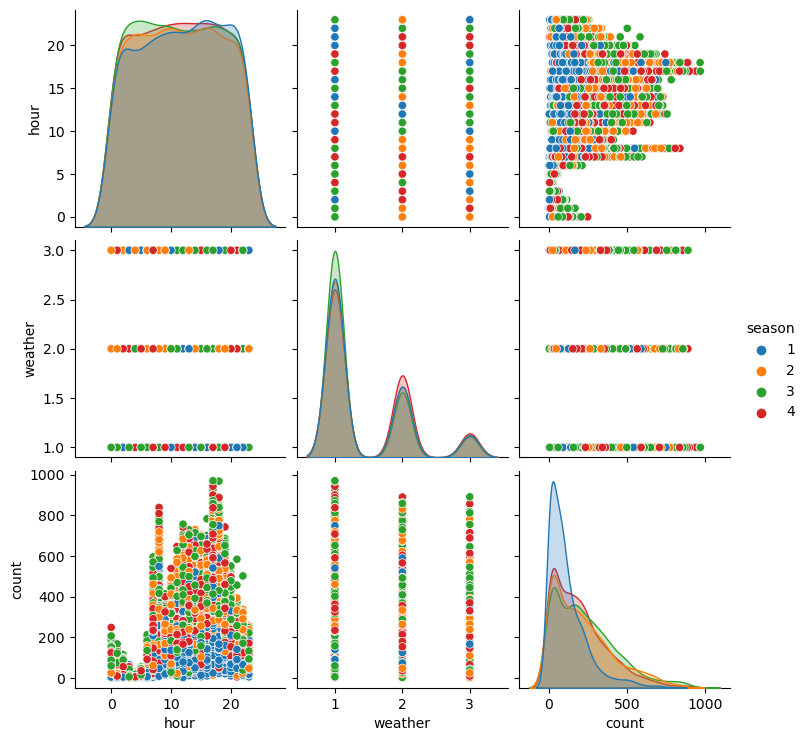

In [ ]:
sns.pairplot(resample_2, hue="season", palette="tab10");

### Group by

In [ ]:
grouped_df = df_train.groupby(['month', 'day'])
grouped_df

In [ ]:
pd.DataFrame(grouped_df.mean())

season   holiday  workingday   weather       temp  \
month     day                                                            
April     Friday        2.0  0.221154    0.778846  1.461538  15.919038   
          Monday        2.0  0.186916    0.813084  1.261682  22.722430   
          Saturday      2.0  0.000000    0.000000  1.724490  16.617551   
          Sunday        2.0  0.000000    0.000000  1.339450  19.130826   
          Thursday      2.0  0.000000    1.000000  1.180851  18.458723   
...                     ...       ...         ...       ...        ...   
September Saturday      3.0  0.000000    0.000000  1.478261  26.047478   
          Sunday        3.0  0.000000    0.000000  1.264000  25.951360   
          Thursday      3.0  0.000000    1.000000  1.660000  25.895600   
          Tuesday       3.0  0.000000    1.000000  1.680412  25.791959   
          Wednesday     3.0  0.000000    1.000000  1.448980  26.173061   

                         atemp   humidity  windspeed         year       hour  \
month     day                                                                  
April     Friday     18.873365  59.365385  15.567643  2011.413462  11.163462   
          Monday     26.536308  49.981308  20.196305  2011.504673  11.869159   
          Saturday   20.082755  63.091837  15.489921  2011.387755  11.459184   
          Sunday     22.803303  54.752294  14.248011  2011.495413  11.926606   
          Thursday   22.226702  50.457447  11.649162  2011.627660  11.765957   
...                        ...        ...        ...          ...        ...   
September Saturday   29.921043  69.547826  13.513259  2011.513043  11.295652   
          Sunday     29.964080  67.472000   9.920181  2011.512000  11.656000   
          Thursday   29.379650  75.030000  11.210641  2011.420000  11.820000   
          Tuesday    29.398402  74.474227  15.464291  2011.608247  11.443299   
          Wednesday  30.172245  68.877551  10.745228  2011.632653  11.979592   

                          week  day_of_week       count  
month     day                                            
April     Friday     14.240385          4.0  165.778846  
          Monday     15.018692          0.0  202.551402  
          Saturday   14.183673          5.0  159.377551  
          Sunday     14.018349          6.0  185.568807  
          Thursday   14.755319          3.0  220.968085  
...                        ...          ...         ...  
September Saturday   36.104348          5.0  249.895652  
          Sunday        35.968          6.0  260.248000  
          Thursday       36.29          3.0  218.230000  
          Tuesday     36.85567          1.0  214.917526  
          Wednesday   36.77551          2.0  250.908163  

[84 rows x 13 columns]

In [ ]:
grouped_for_plot=pd.DataFrame({'mean':df_train.groupby(["hour","day"], 
                                                       sort=True)["count"].mean()}).reset_index()
grouped_for_plot

,hour,day,mean
0,0,Friday,52.724138
1,0,Monday,35.981481
2,0,Saturday,100.629630
3,0,Sunday,98.789474
4,0,Thursday,39.244898
...,...,...,...
163,23,Saturday,121.788462
164,23,Sunday,64.517857
165,23,Thursday,99.220000
166,23,Tuesday,75.137255


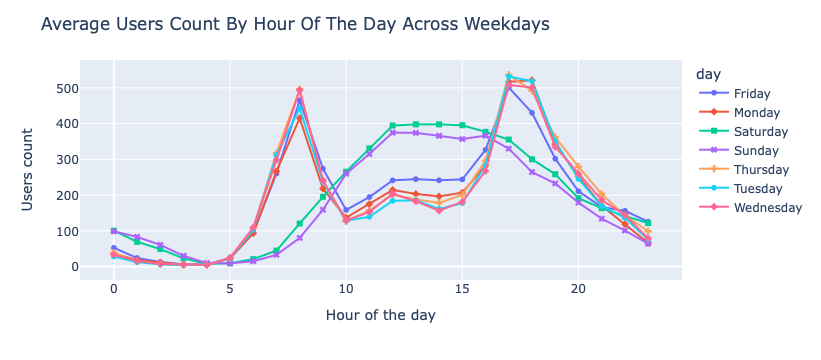

In [ ]:
df = grouped_for_plot
fig = px.line(df, x='hour', y='mean', color='day', symbol='day')
fig.update_layout(title='Average Users Count By Hour Of The Day Across Weekdays',
                   xaxis_title='Hour of the day', yaxis_title='Users count')

fig.show()

In [ ]:
grouped_for_plot_2=pd.DataFrame({'mean':df_train.groupby(["hour","season"], 
                                                       sort=True)["count"].mean()}).reset_index()
grouped_for_plot_2

,hour,season,mean
0,0,1,27.684783
1,0,2,59.602151
2,0,3,80.204082
3,0,4,54.989796
4,1,1,16.202247
...,...,...,...
91,22,4,127.712766
92,23,1,47.010870
93,23,2,102.325581
94,23,3,120.521739


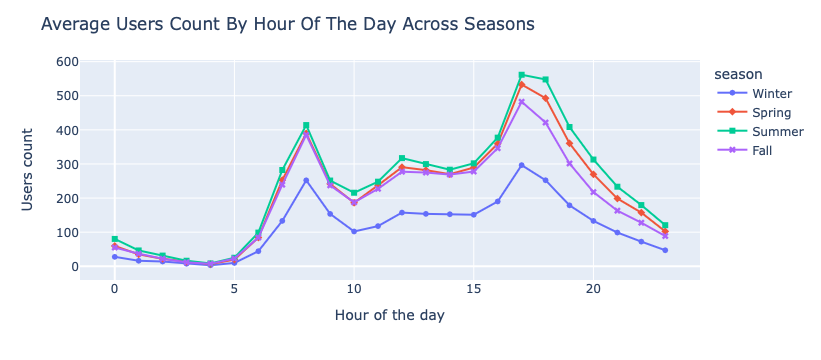

In [ ]:
df = grouped_for_plot_2
fig = px.line(df, x='hour', y='mean', color='season', symbol='season')
fig.update_layout(title='Average Users Count By Hour Of The Day Across Seasons',
                   xaxis_title='Hour of the day', yaxis_title='Users count')
newnames = {'1':'Winter', '2': 'Spring', '3': 'Summer', '4':'Fall'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

fig.show()

### Extra plots for EDA 

* Season 

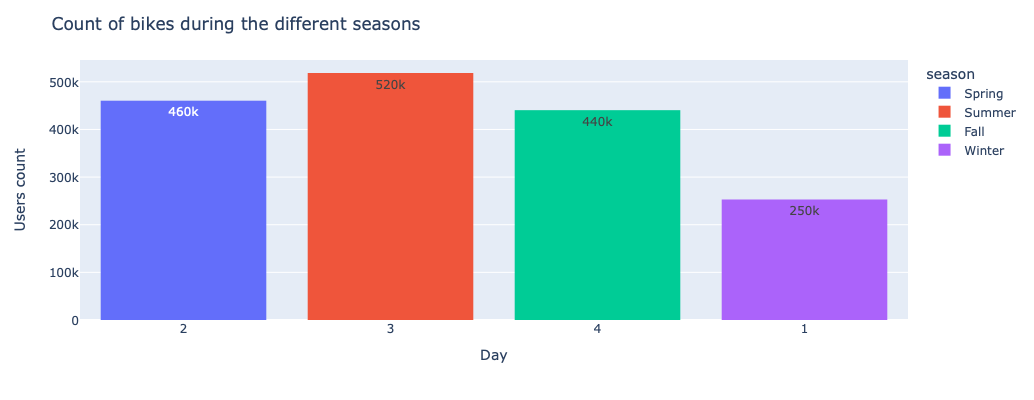

In [ ]:
df = df_train
fig = px.histogram(df, x="season", y="count",
             color='season',
             height=400, text_auto='.2s', )
fig.update_layout(title='Count of bikes during the different seasons',
                   xaxis_title='Day', yaxis_title='Users count')
newnames = {'1':'Winter', '2': 'Spring', '3': 'Summer', '4':'Fall'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.update_xaxes(type='category')
fig.show()

In [ ]:
data = df_train[['hour', 'season','count']]
data.sample(5)

,hour,season,count
9624,9,4,384
9495,0,3,26
7235,20,2,404
9089,2,3,84
7894,7,2,87


In [ ]:
data = pd.pivot_table(data, values='count', columns='season', index='hour')
data.sample(5)

season,1,2,3,4
hour,,,,
19,178.706522,360.523256,408.333333,301.440860
6,44.195122,84.197531,98.750000,84.173913
18,252.227273,492.860465,547.791209,421.431579
11,117.760870,237.521739,248.021978,227.134831
13,153.659091,281.913043,299.620690,274.826087


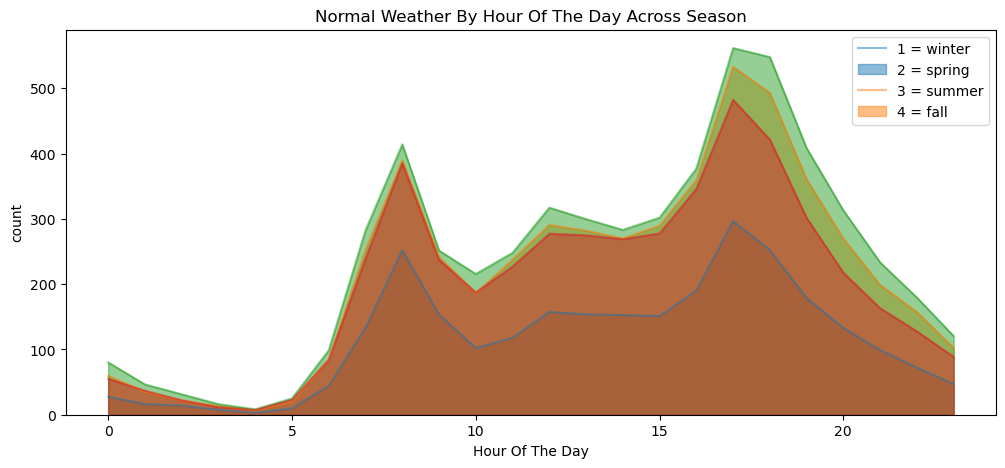

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
data.plot.area(stacked=False, ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='count', 
       title="Normal Weather By Hour Of The Day Across Season")
ax.legend(['1 = winter', '2 = spring', '3 = summer', '4 = fall']);

* Weather

In [ ]:
df_train['weather'].unique()

array([1, 2, 3])

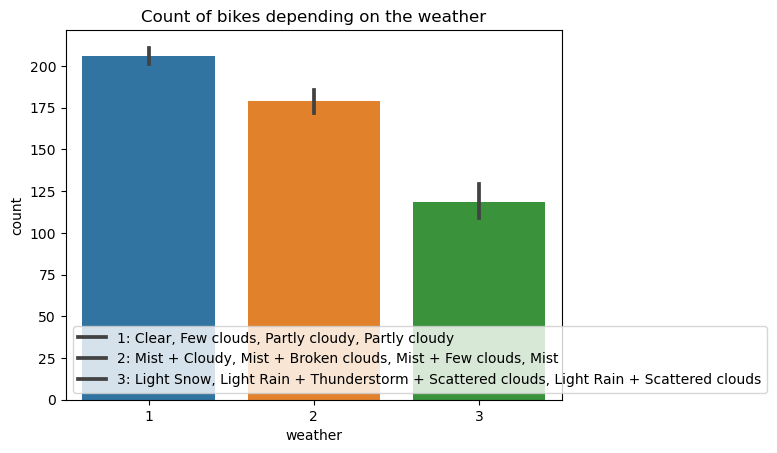

In [ ]:
fig, ax = plt.subplots()
sns.barplot(data=df_train, x='weather', y='count', ax=ax)
ax.set(title='Count of bikes depending on the weather')
plt.legend(['1: Clear, Few clouds, Partly cloudy, Partly cloudy', 
'2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 
'3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds']);

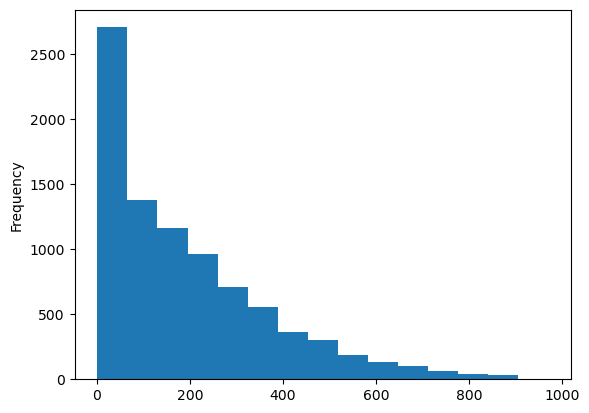

In [ ]:
# Histogram bins color figsize
df_train['count'].plot.hist(bins=15);

<AxesSubplot: xlabel='count', ylabel='Density'>

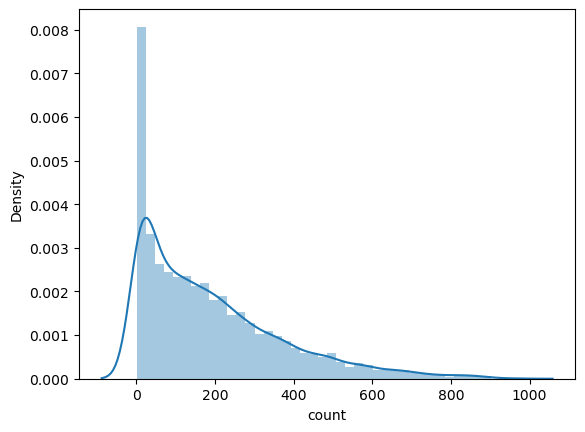

In [ ]:
sns.distplot(df_train['count'])

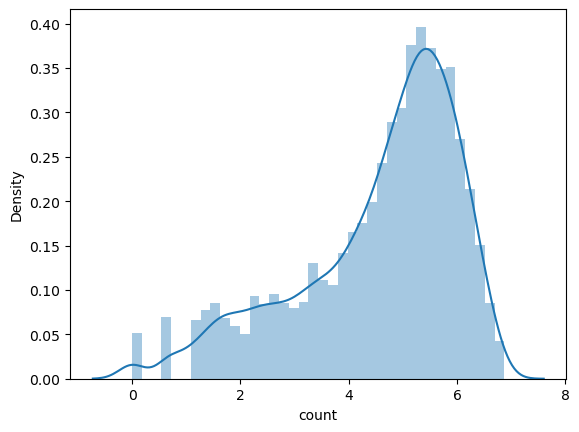

<Figure size 640x480 with 0 Axes>

In [ ]:
df_log = np.log(df_train['count'])
sns.distplot(df_log)
fig = plt.figure()

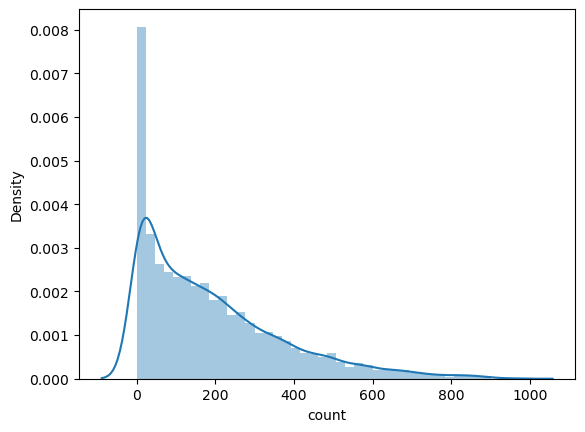

<Figure size 640x480 with 0 Axes>

In [ ]:
df_unlog = np.expm1(df_log)
sns.distplot(df_unlog)
fig = plt.figure()

In [ ]:
df_corr = df_train.corr()
df_corr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,week,day_of_week,count
season,1.000000,0.028542,-0.010138,0.015830,0.256506,0.262131,0.193317,-0.146005,-0.003744,-0.013413,0.936926,-0.012050,0.163085
holiday,0.028542,1.000000,-0.256717,-0.009118,0.005949,-0.000031,0.000238,0.017859,0.004690,0.002680,-0.000975,-0.190150,-0.006614
workingday,-0.010138,-0.256717,1.000000,0.034361,0.024516,0.019032,-0.003508,0.003801,0.004402,-0.006586,-0.026764,-0.702323,0.008060
weather,0.015830,-0.009118,0.034361,1.000000,-0.063023,-0.062363,0.408396,0.012406,-0.014321,-0.023946,0.027092,-0.049587,-0.132341
temp,0.256506,0.005949,0.024516,-0.063023,1.000000,0.984030,-0.057805,-0.029939,0.066979,0.138335,0.236846,-0.038061,0.394284
atemp,0.262131,-0.000031,0.019032,-0.062363,0.984030,1.000000,-0.036137,-0.069830,0.063571,0.134408,0.244402,-0.039827,0.388975
humidity,0.193317,0.000238,-0.003508,0.408396,-0.057805,-0.036137,1.000000,-0.311076,-0.079648,-0.278075,0.220784,-0.034293,-0.315751
windspeed,-0.146005,0.017859,0.003801,0.012406,-0.029939,-0.069830,-0.311076,1.000000,-0.014156,0.144098,-0.146320,-0.023487,0.092933
year,-0.003744,0.004690,0.004402,-0.014321,0.066979,0.063571,-0.079648,-0.014156,1.000000,-0.002115,-0.002417,-0.002098,0.259685
hour,-0.013413,0.002680,-0.006586,-0.023946,0.138335,0.134408,-0.278075,0.144098,-0.002115,1.000000,-0.013353,0.004253,0.397325


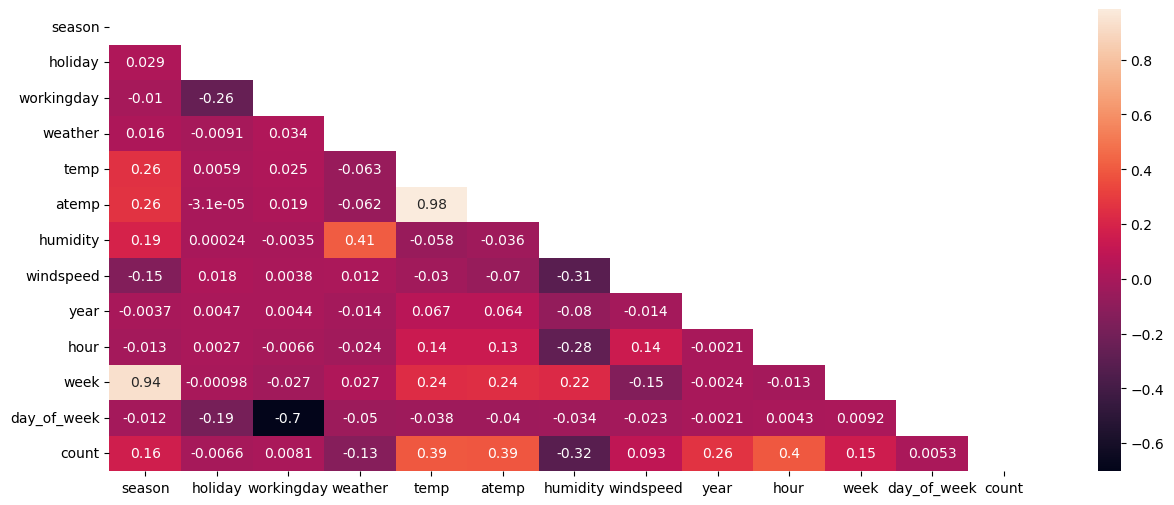

In [ ]:
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(df_corr, mask=mask, annot=True, ax=ax);